In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [2]:
path = 'Car details v3.csv'
data = pd.read_csv(path)

data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [5]:
target = 'selling_price'

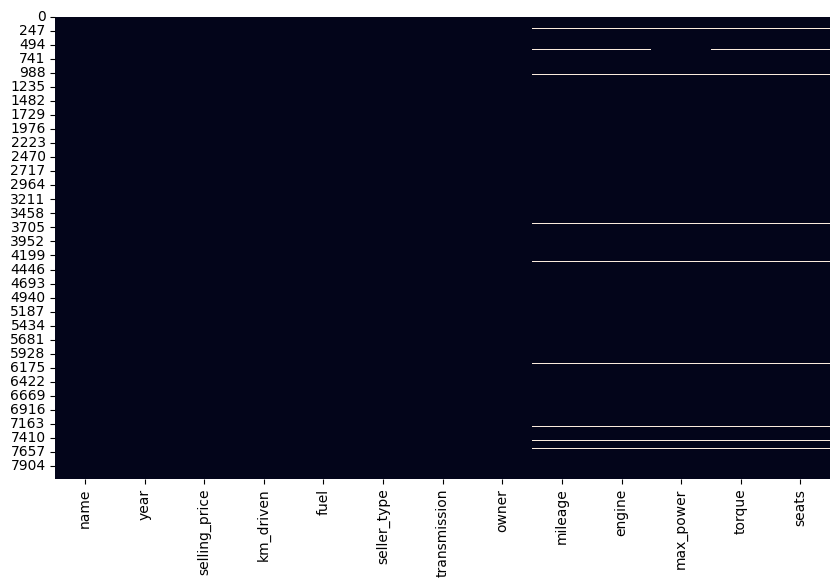

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isna(), cbar=False)
plt.show()

### Valeur numeriques

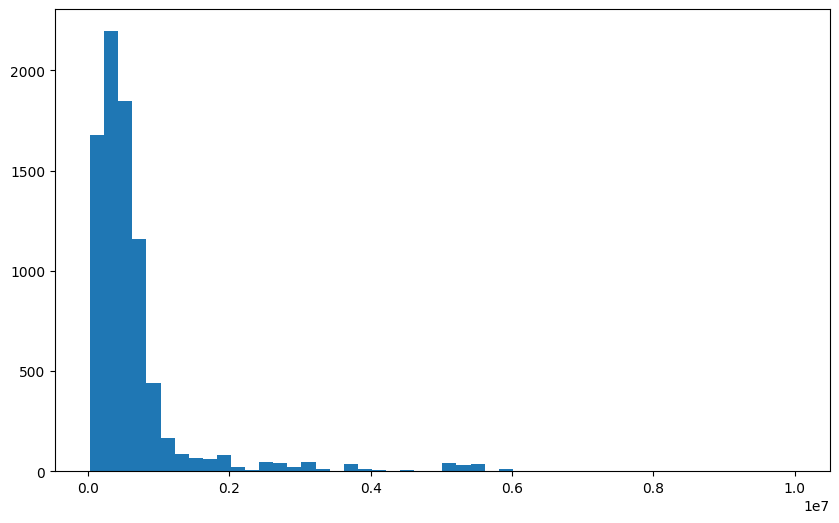

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(x=data[target], bins=50)
plt.show()

In [8]:
Q1 = data[target].quantile(0.25)
Q3 = data[target].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data[target] < lower_bound) | (data[target] > upper_bound)]
outliers

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
41,Jeep Compass 1.4 Limited Plus BSIV,2019,2100000,5000,Petrol,Individual,Automatic,First Owner,16.0 kmpl,1368 CC,160.77 bhp,250Nm@ 1750-2500rpm,5.0
47,Toyota Fortuner 4x4 MT,2014,1500000,77000,Diesel,Dealer,Manual,First Owner,12.55 kmpl,2982 CC,168.5 bhp,343Nm@ 1400-3400rpm,7.0
49,Mercedes-Benz B Class B180,2014,1450000,27800,Diesel,Dealer,Automatic,Second Owner,14.8 kmpl,2143 CC,120.7 bhp,200Nm@ 1250-4000rpm,5.0
55,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1650000,127700,Diesel,Dealer,Automatic,Second Owner,11.36 kmpl,2755 CC,171.5 bhp,360Nm@ 1200-3400rpm,7.0
57,Audi A6 2.0 TDI Technology,2013,1750000,33900,Diesel,Dealer,Automatic,Second Owner,17.68 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,Toyota Innova 2.5 ZX Diesel 7 Seater BSIII,2015,1400000,170000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,7.0
7967,BMW 3 Series 320d Sedan,2011,1500000,84925,Diesel,Individual,Automatic,First Owner,16.07 kmpl,1995 CC,181 bhp,380Nm@ 1750-3000rpm,5.0
7973,Toyota Innova 2.5 ZX Diesel 7 Seater BSIII,2015,1400000,170000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100.6 bhp,200Nm@ 1400-3400rpm,7.0
8058,Audi A3 40 TFSI Premium,2017,1689999,8000,Petrol,Dealer,Automatic,First Owner,16.6 kmpl,1798 CC,177.5 bhp,250Nm@ 1250-5000rpm,5.0


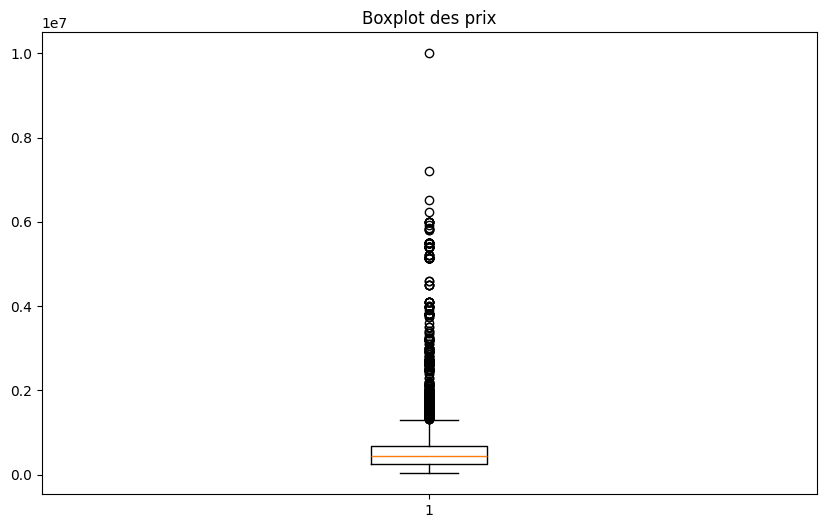

In [9]:
plt.figure(figsize=(10, 6))
plt.boxplot(data[target])
plt.title('Boxplot des prix')
plt.show()

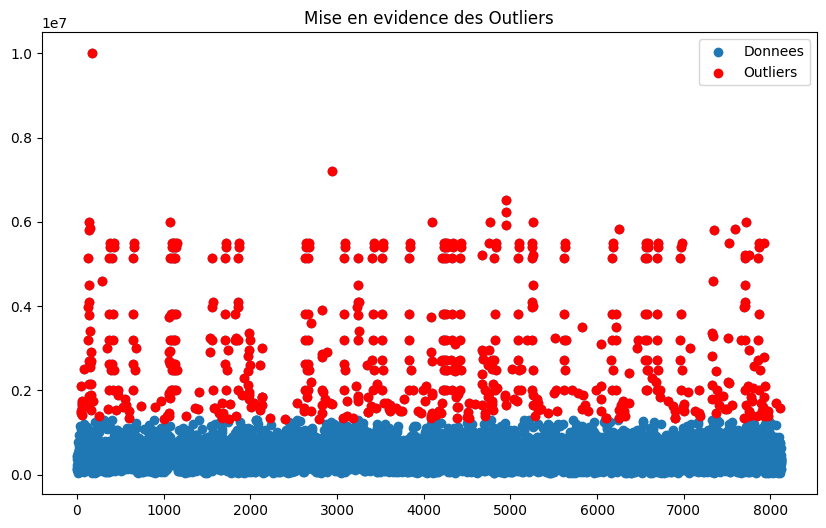

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[target], label='Donnees')

plt.scatter(outliers.index, outliers[target], color='red', label='Outliers')
plt.title('Mise en evidence des Outliers')
plt.legend()
plt.show()

In [11]:
outliers_ratio = (outliers.shape[0] / data.shape[0]) * 100
outliers_ratio

7.381889763779527

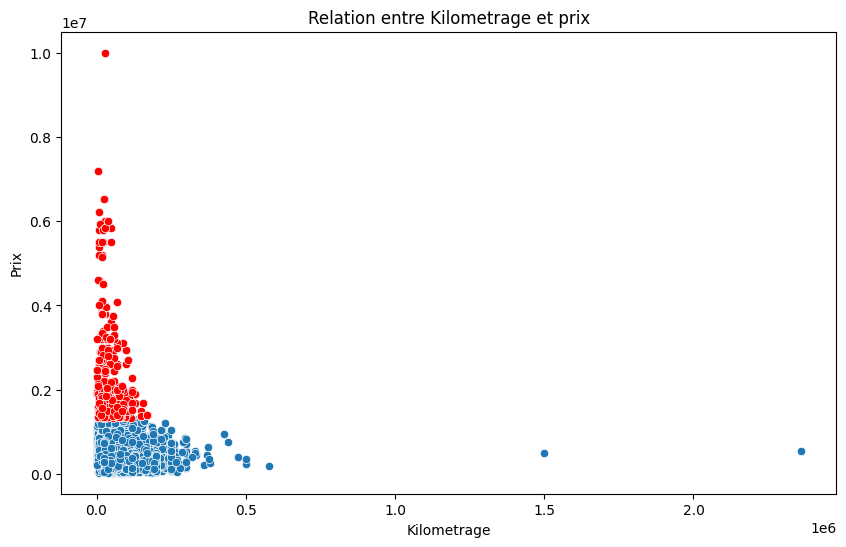

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y=target, data=data)

sns.scatterplot(x='km_driven', y=target, data=outliers, color='red')
plt.title('Relation entre Kilometrage et prix')
plt.xlabel('Kilometrage')
plt.ylabel('Prix')
plt.show()

In [13]:
data_no_outliers = data[(data[target] >= lower_bound) & (data[target] < upper_bound)]
data_no_outliers

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


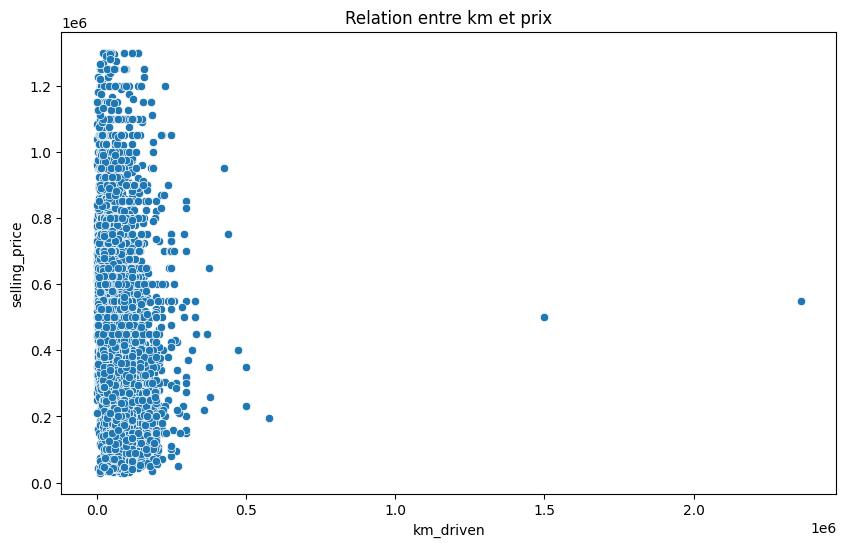

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y=target, data=data_no_outliers)
plt.title('Relation entre km et prix')
plt.show()

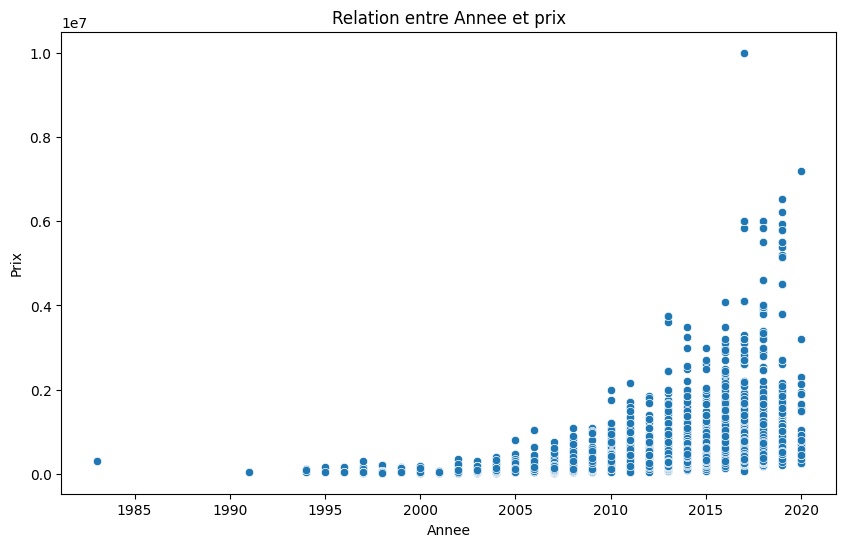

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y=target, data=data)
plt.title('Relation entre Annee et prix')
plt.xlabel('Annee')
plt.ylabel('Prix')
plt.show()

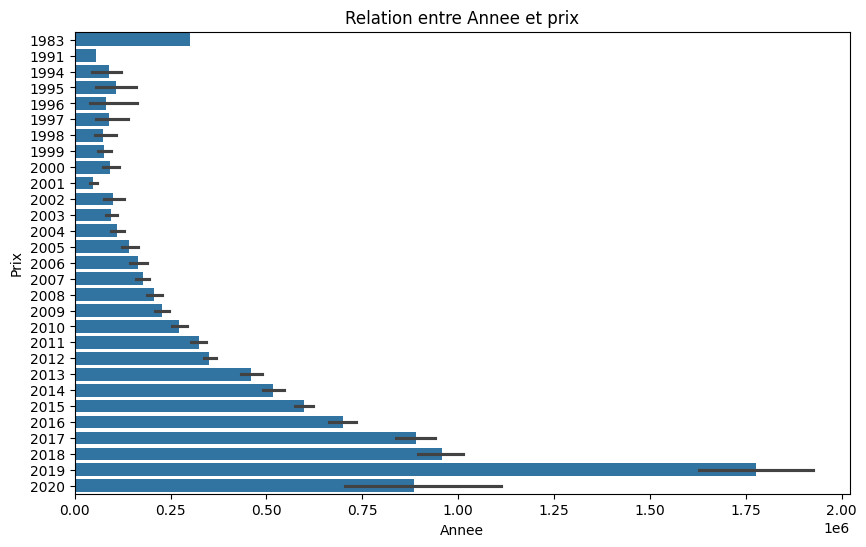

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=target, y='year', data=data, orient='y')
plt.title('Relation entre Annee et prix')
plt.xlabel('Annee')
plt.ylabel('Prix')
plt.show()

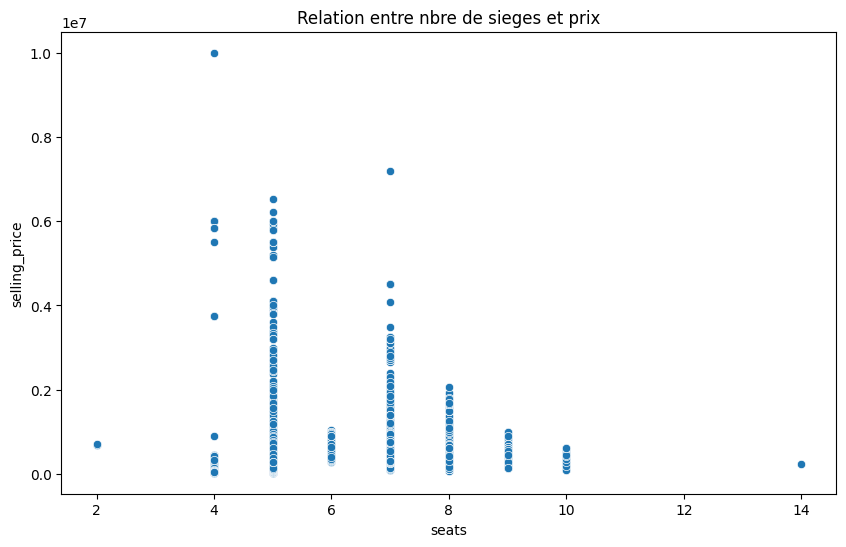

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='seats', y=target, data=data)
plt.title('Relation entre nbre de sieges et prix')
plt.show()

In [18]:
data['max_power'] = data['max_power'].str.extract('(\d+)').astype('float64')
data['engine'] = data['engine'].str.extract('(\d+)').astype('float64')
data['mileage'] = data['mileage'].str.extract('(\d+)').astype('float64')

In [19]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.0,1197.0,82.0,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.0,1493.0,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.0,1248.0,73.0,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.0,1396.0,70.0,140Nm@ 1800-3000rpm,5.0


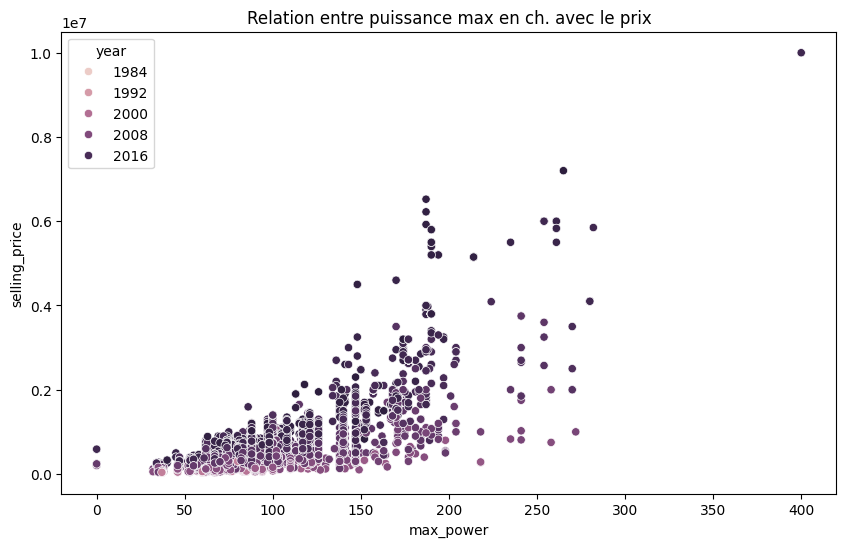

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=target, x='max_power', data=data, hue='year')
plt.title('Relation entre puissance max en ch. avec le prix')
plt.show()

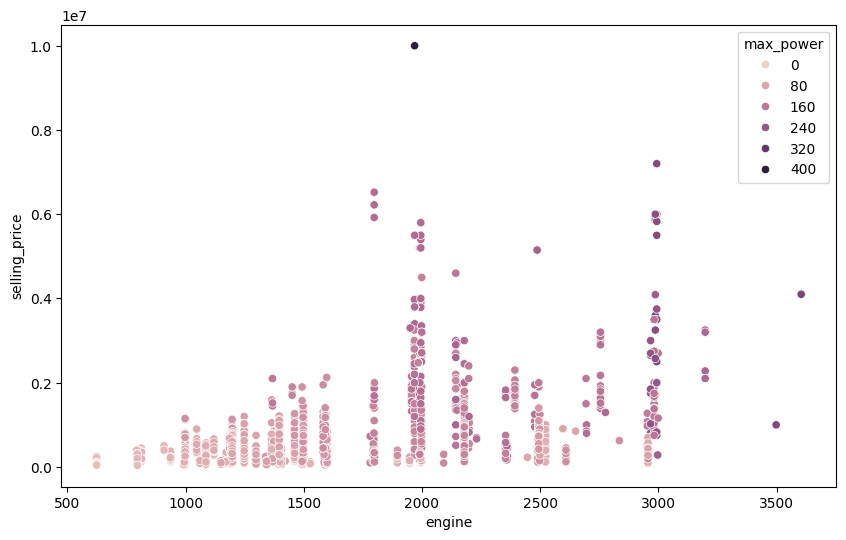

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y=target, x='engine', data=data, hue='max_power')
plt.show()

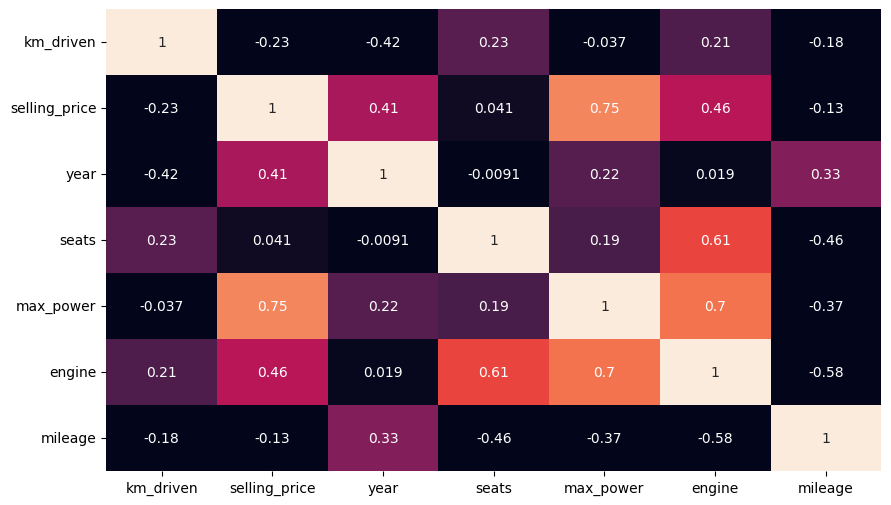

,km_driven,selling_price,year,seats,max_power,engine,mileage
km_driven,1.000000,-0.225534,-0.418006,0.227336,-0.037085,0.205914,-0.175005
selling_price,-0.225534,1.000000,0.414092,0.041358,0.748797,0.455734,-0.125297
year,-0.418006,0.414092,1.000000,-0.009144,0.224196,0.018848,0.331326
seats,0.227336,0.041358,-0.009144,1.000000,0.192979,0.610309,-0.457519
max_power,-0.037085,0.748797,0.224196,0.192979,1.000000,0.704896,-0.367952
engine,0.205914,0.455734,0.018848,0.610309,0.704896,1.000000,-0.576944
mileage,-0.175005,-0.125297,0.331326,-0.457519,-0.367952,-0.576944,1.000000


In [22]:
corr_matrix = data[['km_driven', target, 'year', 'seats', 'max_power', 'engine', 'mileage']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_matrix, vmin=0, vmax=1, cbar=False, annot=True)
plt.show()
corr_matrix

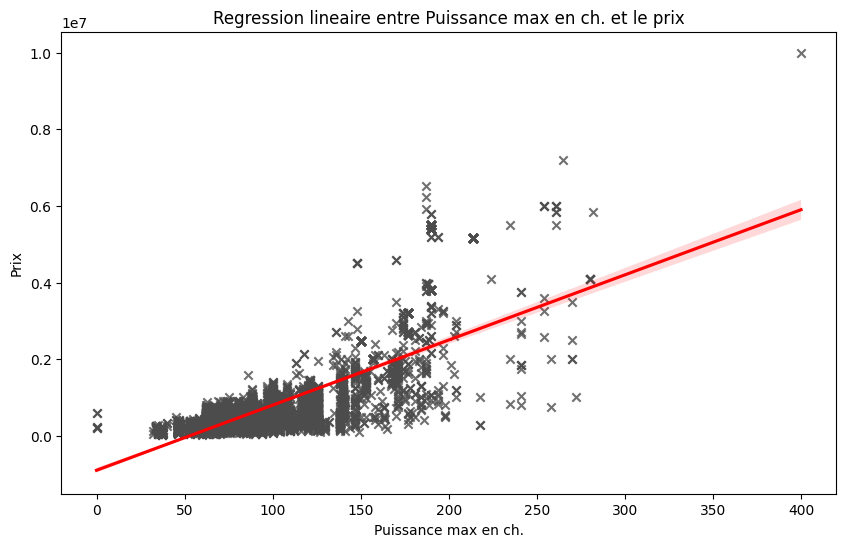

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='max_power', y=target, data=data, marker='x', line_kws=dict(color='r'), color='.3')
plt.title('Regression lineaire entre Puissance max en ch. et le prix')
plt.xlabel('Puissance max en ch.')
plt.ylabel('Prix')
plt.show()

## PREPROCESSING

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [25]:
X = data.drop(['selling_price', 'name', 'torque', 'engine', 'fuel', 'seller_type', 'transmission', 'owner'], axis=1)
y = data[target].dropna()

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       8128 non-null   int64  
 1   km_driven  8128 non-null   int64  
 2   mileage    7907 non-null   float64
 3   max_power  7912 non-null   float64
 4   seats      7907 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 317.6 KB


In [27]:
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_clean = imputer_mean.fit_transform(X)
data_clean

array([[2.014e+03, 1.455e+05, 2.300e+01, 7.400e+01, 5.000e+00],
       [2.014e+03, 1.200e+05, 2.100e+01, 1.030e+02, 5.000e+00],
       [2.006e+03, 1.400e+05, 1.700e+01, 7.800e+01, 5.000e+00],
       ...,
       [2.009e+03, 1.200e+05, 1.900e+01, 7.300e+01, 5.000e+00],
       [2.013e+03, 2.500e+04, 2.300e+01, 7.000e+01, 5.000e+00],
       [2.013e+03, 2.500e+04, 2.300e+01, 7.000e+01, 5.000e+00]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data_clean, y, test_size=0.33, random_state=42)

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
predict = lin_reg.predict(X_test)
print(f"Linear Regression MSE : {sqrt(mean_squared_error(y_test, predict))}")
print(f"Linear Regression R2 Score: {r2_score(y_test, predict)}")

Linear Regression MSE : 488973.89822466165
Linear Regression R2 Score: 0.6497607126627102


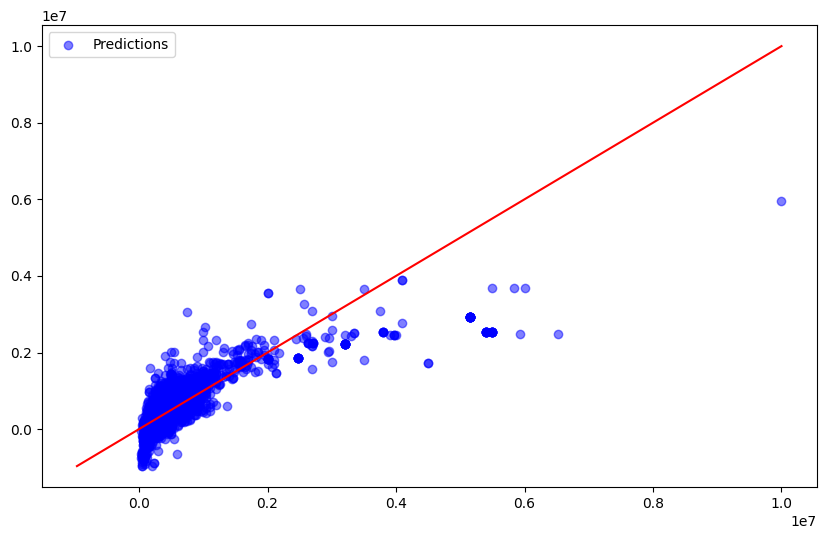

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predict, alpha=0.5, color='blue', label='Predictions')

min_val = min(y_test.min(), predict.min())
max_val = max(y_test.max(), predict.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.legend()
plt.show()

In [40]:
from math import sqrt 

In [41]:
degree = 3
model = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

predicts = model.predict(X_test)

print(f"Ridge MSE : {sqrt(mean_squared_error(y_test, predicts))}")
print(f"Ridge R2 Score: {r2_score(y_test, predicts)}")

Ridge MSE : 323612.0943608122
Ridge R2 Score: 0.8465937706853333


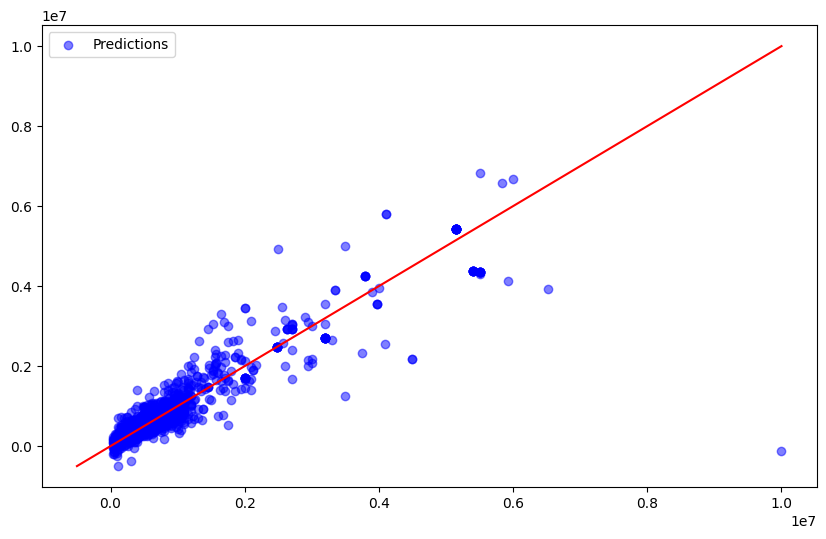

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicts, alpha=0.5, color='blue', label='Predictions')

min_val = min(y_test.min(), predicts.min())
max_val = max(y_test.max(), predicts.max())

plt.plot([min_val, max_val], [min_val, max_val], color='red')
plt.legend()
plt.show()

In [34]:
forest_X_train, forest_X_test, forest_y_train, forest_y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
forest = RandomForestRegressor(random_state=42)

forest.fit(forest_X_train, forest_y_train)

forest_predict = forest.predict(forest_X_test)

In [43]:
print(f"RandForest MSE : {sqrt(mean_squared_error(forest_y_test, forest_predict))}")
print(f"RandForest R2 Score: {r2_score(forest_y_test, forest_predict)}")

RandForest MSE : 161714.96823512146
RandForest R2 Score: 0.9601032010231375
